<a href="https://colab.research.google.com/github/akshaypt7/hand_writtten_formulas_to_latex/blob/main/ai_2_model_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import h5py
import PIL.Image
import os, shutil
from keras.models import load_model
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from keras.regularizers import l2

from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras import Sequential

from keras import layers
from keras import models

from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !unzip '/content/drive/MyDrive/AI_2/project/Post-hurricane.zip' -d '/content/drive/MyDrive/AI_2/project/'

In [ ]:
train_damage_dir = '/content/drive/MyDrive/AI_2/project/train_another/damage'
validation_damage_dir = '/content/drive/MyDrive/AI_2/project/validation_another/damage'
unbalanced_test_damage_dir = '/content/drive/MyDrive/AI_2/project/test_another/damage'
test_damage_dir = '/content/drive/MyDrive/AI_2/project/test/damage'

train_nodamage_dir = '/content/drive/MyDrive/AI_2/project/train_another/no_damage'
validation_nodamage_dir = '/content/drive/MyDrive/AI_2/project/validation_another/no_damage'
unbalanced_test_nodamage_dir = '/content/drive/MyDrive/AI_2/project/test_another/no_damage'
test_nodamage_dir = '/content/drive/MyDrive/AI_2/project/test_another/no_damage'

In [ ]:
print('total training damage images: ',len(os.listdir(train_damage_dir)))
print('total validation damage images: ',len(os.listdir(validation_damage_dir)))
print('total  test damage images: ',len(os.listdir(test_damage_dir)))
print('total  test_unbalanced_ds damage images: ',len(os.listdir(unbalanced_test_damage_dir)))

print('---')
print('total training no damage images: ',len(os.listdir(train_nodamage_dir)))
print('total validation no damage images: ',len(os.listdir(validation_nodamage_dir)))
print('total test no damage images: ',len(os.listdir(test_nodamage_dir)))
print('total  test_unbalanced_ds no damage images: ',len(os.listdir(unbalanced_test_nodamage_dir)))

total training damage images:  5000
total validation damage images:  1000
total  test damage images:  1000
total  test_unbalanced_ds damage images:  8000
---
total training no damage images:  5000
total validation no damage images:  1000
total test no damage images:  1000
total  test_unbalanced_ds no damage images:  1000


In [3]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = Sequential(name = 'model_from_scratch')
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


In [ ]:

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy',precision_m,recall_m,f1_m])

In [ ]:


#normalize the image pixel value to be between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    '/content/drive/MyDrive/AI_2/project/train_another', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    '/content/drive/MyDrive/AI_2/project/validation_another',
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
step_size_train = train_generator.n//train_generator.batch_size
step_size_validation = validation_generator.n//validation_generator.batch_size

In [ ]:
history = model.fit(
        train_generator,
        epochs=15,
        validation_data=validation_generator,
         steps_per_epoch=step_size_train,
        validation_steps= step_size_validation
        )

Epoch 1/15
312/312 [==============================] - 40s 128ms/step - loss: 0.1969 - accuracy: 0.9188 - precision_m: 0.9260 - recall_m: 0.9150 - f1_m: 0.9163 - val_loss: 0.1720 - val_accuracy: 0.9345 - val_precision_m: 0.9295 - val_recall_m: 0.9385 - val_f1_m: 0.9320
Epoch 2/15
312/312 [==============================] - 40s 127ms/step - loss: 0.1519 - accuracy: 0.9382 - precision_m: 0.9446 - recall_m: 0.9331 - f1_m: 0.9356 - val_loss: 0.1432 - val_accuracy: 0.9511 - val_precision_m: 0.9430 - val_recall_m: 0.9574 - val_f1_m: 0.9486
Epoch 3/15
312/312 [==============================] - 39s 124ms/step - loss: 0.1202 - accuracy: 0.9516 - precision_m: 0.9546 - recall_m: 0.9496 - f1_m: 0.9498 - val_loss: 0.1310 - val_accuracy: 0.9572 - val_precision_m: 0.9740 - val_recall_m: 0.9390 - val_f1_m: 0.9549
Epoch 4/15
312/312 [==============================] - 40s 127ms/step - loss: 0.1113 - accuracy: 0.9577 - precision_m: 0.9591 - recall_m: 0.9578 - f1_m: 0.9565 - val_loss: 0.1548 - val_accuracy:

In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/AI_2/project')

In [ ]:
model_1 = Sequential(name = 'model_from_scratch')
model_1.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(512,activation = 'relu'))
model_1.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model_1.load_weights('/content/drive/MyDrive/AI_2/project')

In [ ]:

model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy',precision_m,recall_m,f1_m])

In [ ]:
model_1.fit(
        train_generator,
        epochs=1,
        validation_data=validation_generator,
         steps_per_epoch=step_size_train,
        validation_steps= step_size_validation
        )

312/312 [==============================] - 42s 129ms/step - loss: 0.0340 - accuracy: 0.9887 - precision_m: 0.9892 - recall_m: 0.9871 - f1_m: 0.9876 - val_loss: 0.1456 - val_accuracy: 0.9688 - val_precision_m: 0.9635 - val_recall_m: 0.9737 - val_f1_m: 0.9676


In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/AI_2/project')

# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
model.save('/content/drive/MyDrive/AI_2/project/model.h5')

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
model.fit(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)

In [ ]:
train_generator[0][0][0].shape

(150, 150, 3)

(-0.5, 149.5, 149.5, -0.5)

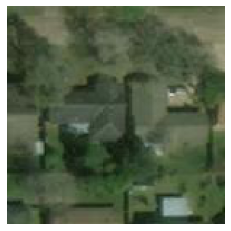

In [ ]:
plt.imshow(train_generator[0][0][0])
plt.axis('off')

In [ ]:
validation_generator[0][0].shape

(20, 150, 150, 3)

avg pooling, max pooling

In [ ]:
ste

In [ ]:
# epochs = 5
# model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics="accuracy")
history = model.fit_generator(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ignored

In [ ]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50


TypeError: ignored